In [4]:
import pandas as pd
df = pd.read_csv("/Users/karina/Desktop/рк/yellow_tripdata.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RateCodeID             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    3
total_amount             0
hour                     0
day_of_week              0
trip_time                0
speed                    0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [12]:
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

In [51]:
df = df.dropna()

In [6]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['speed'] = df['trip_distance'] / (df['trip_time'] / 60 + 0.001)

In [8]:
trips_per_hour = df['hour'].value_counts().sort_index()
print(trips_per_hour)

hour
0     469971
1     355145
2     268133
3     198524
4     143271
5     127437
6     268455
7     456127
8     561802
9     580034
10    567818
11    596504
12    637479
13    635587
14    658887
15    648688
16    576598
17    668790
18    799587
19    805230
20    733952
21    711579
22    686959
23    592429
Name: count, dtype: int64


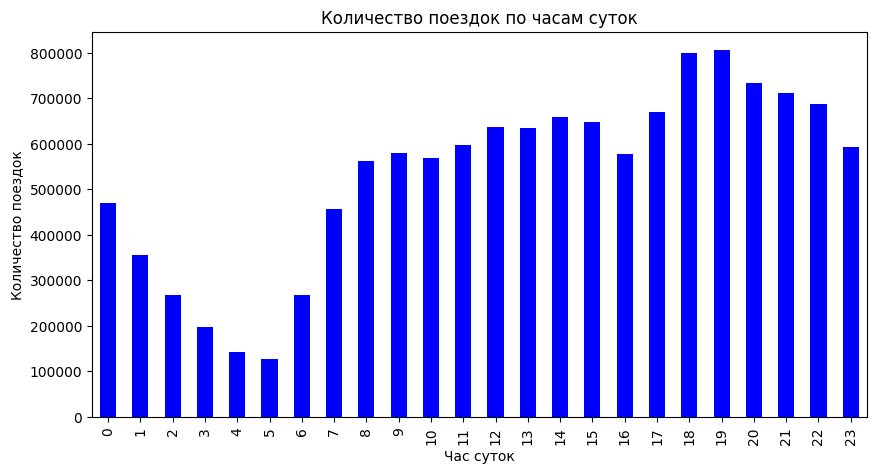

In [12]:
trips_per_hour.plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Час суток")
plt.ylabel("Количество поездок")
plt.title("Количество поездок по часам суток")
plt.show()

In [44]:
trips_per_day = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print(trips_per_day)

day_of_week
Monday       1323282
Tuesday      1365001
Wednesday    1672884
Thursday     2153341
Friday       2212719
Saturday     2364954
Sunday       1572401
Name: count, dtype: int64


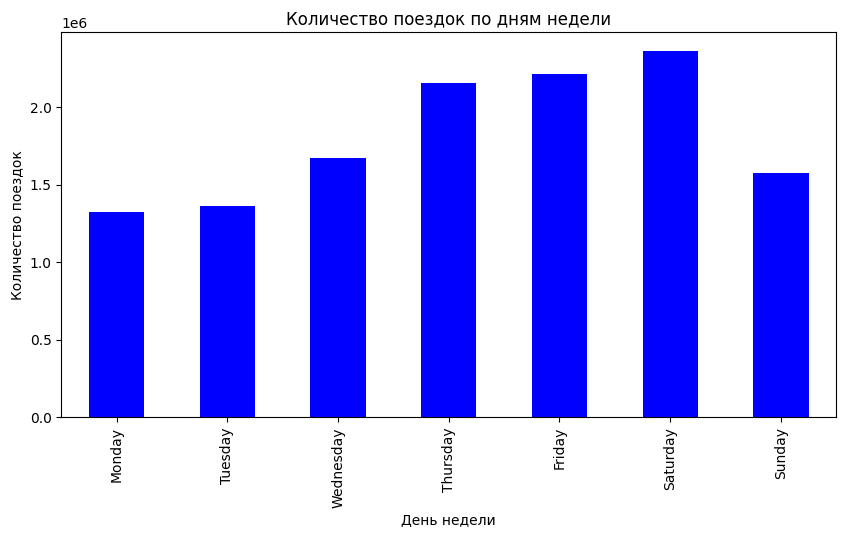

In [38]:
trips_per_day.plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("День недели")
plt.ylabel("Количество поездок")
plt.title("Количество поездок по дням недели")
plt.show()

In [48]:
df = df[df['fare_amount'] > 0]
avg_fare_per_hour = df.groupby('hour')['fare_amount'].mean()
print(avg_fare_per_hour)

hour
0     12.659186
1     12.504389
2     12.456262
3     12.954536
4     14.540374
5     15.602318
6     12.831359
7     11.744691
8     11.508278
9     11.449481
10    11.399576
11    11.345536
12    11.322780
13    11.628493
14    12.136056
15    12.226543
16    12.062675
17    11.612604
18    11.211346
19    11.086243
20    11.453407
21    11.854820
22    12.170696
23    12.592446
Name: fare_amount, dtype: float64


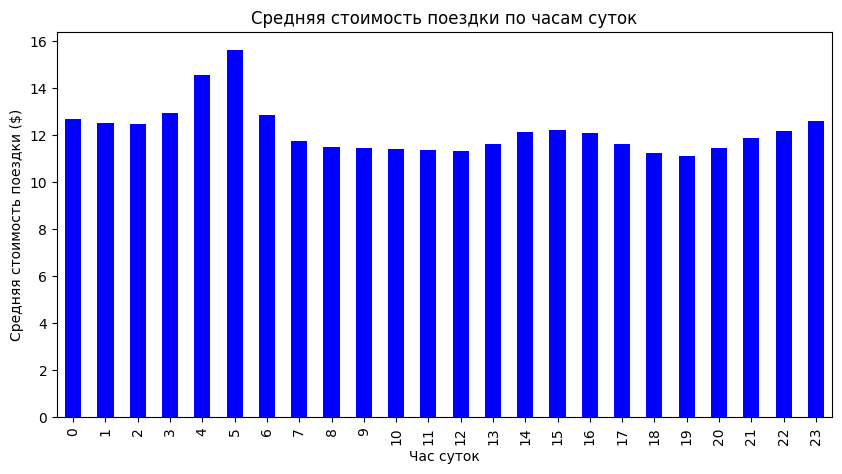

In [50]:
avg_fare_per_hour.plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Час суток")
plt.ylabel("Средняя стоимость поездки ($)")
plt.title("Средняя стоимость поездки по часам суток")
plt.show()

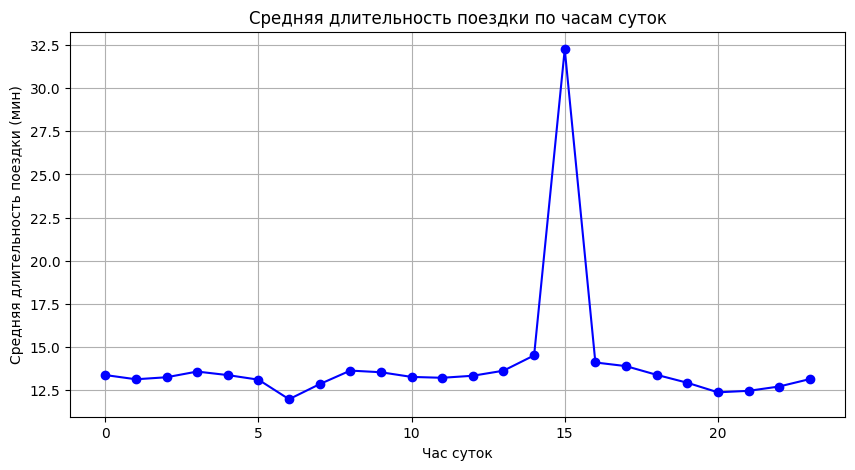

In [55]:
df['trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['hour'] = df['tpep_pickup_datetime'].dt.hour
avg_time_per_hour = df.groupby('hour')['trip_time'].mean()
avg_time_per_hour.plot(kind='line', figsize=(10,5), marker='o', color='blue')
plt.xlabel("Час суток")
plt.ylabel("Средняя длительность поездки (мин)")
plt.title("Средняя длительность поездки по часам суток")
plt.grid(True)
plt.show()

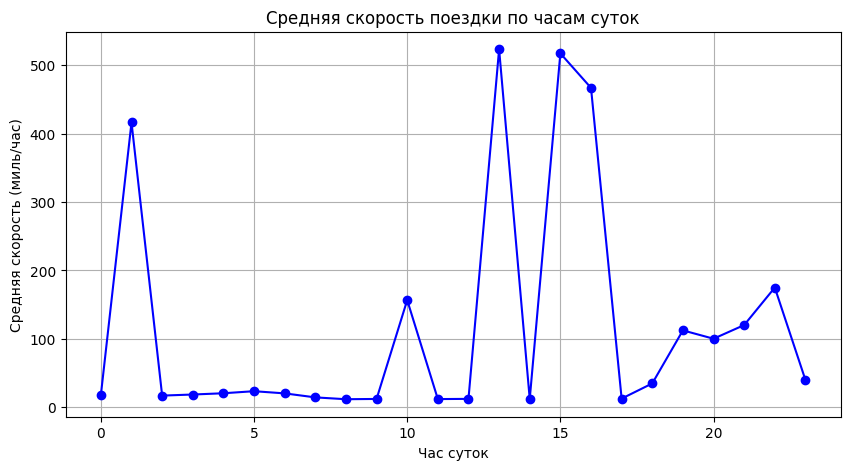

In [54]:
avg_speed_per_hour.plot(kind='line', figsize=(10,5), marker='o', color='blue')
plt.xlabel("Час суток")
plt.ylabel("Средняя скорость (миль/час)")
plt.title("Средняя скорость поездки по часам суток")
plt.grid(True)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [9]:
df['trip_distance'].max()

np.float64(15420004.5)

In [10]:
df.loc[df['trip_distance'].idmax()]

AttributeError: 'Series' object has no attribute 'idmax'